### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_)
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [45]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

def show_all(images = [], vertical = False):
    def append_plot(ax, image):
        ax.imshow(image, 'gray')

    n = len(images)
    shorter_side = 10 * 2
    longer_side = 5 * len(images) * 2

    if vertical:
        fig, axs = plt.subplots( n, 1 )
        fig.set_size_inches(shorter_side, longer_side)
    else:
        fig, axs = plt.subplots( 1, n )
        fig.set_size_inches(longer_side, shorter_side)


    if len(images) == 1:
        image = images[0]
        append_plot(axs, image)
    else:
        for i in range(len(images)):
            image = images[i]
            append_plot(axs[i], image)
    plt.show()

def open_image(path, gray = True):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY if gray else cv2.COLOR_BGR2RGB)
    return image

image_home = open_image('dom.png')
image_squares = open_image('kwadraty.png')
image_lab = open_image('lab112.png')


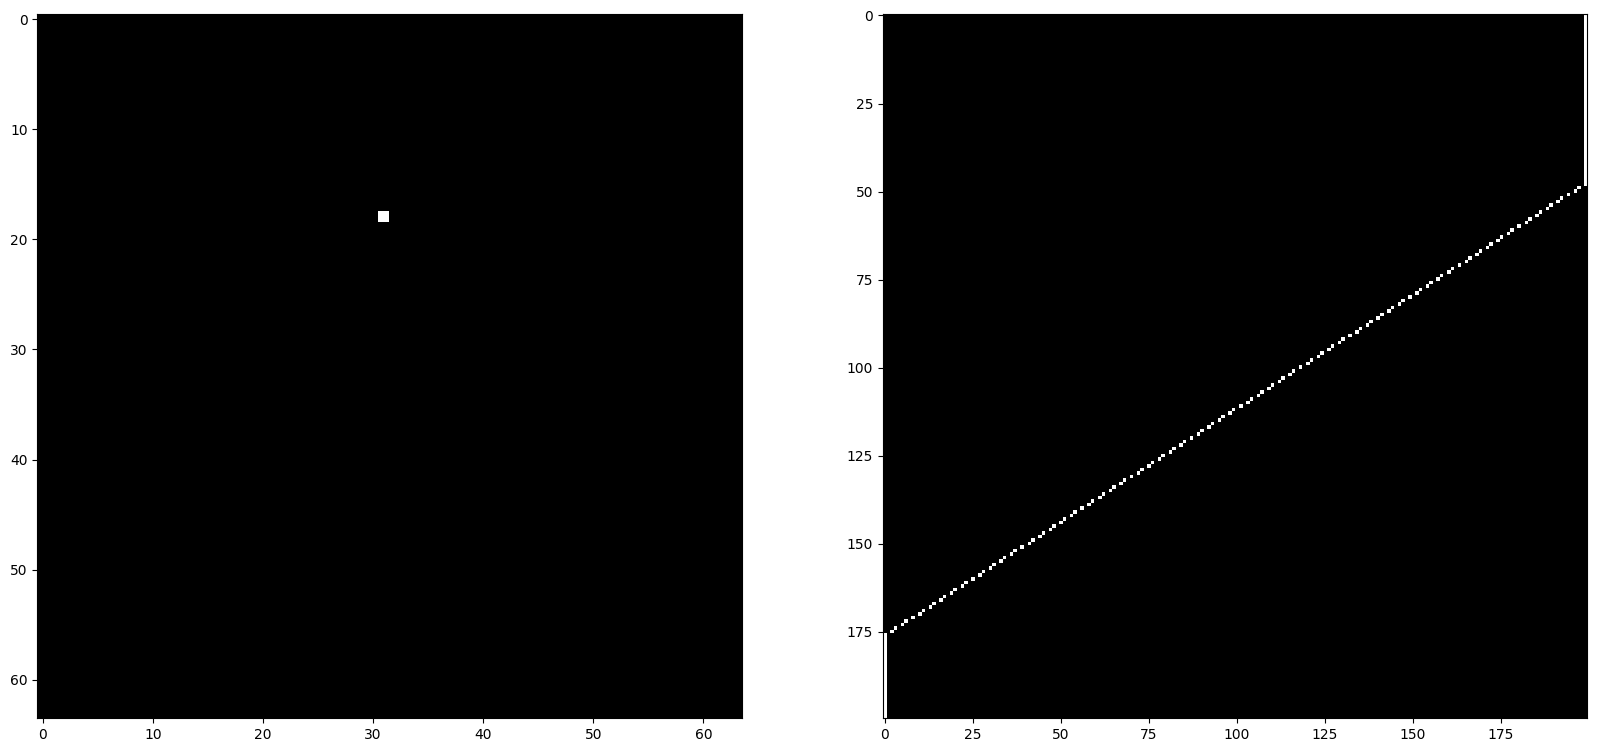

In [46]:
def hough_ab(
    image,
    a_min, a_max, a_step,
    b_min, b_max, b_step
):

    A = np.arange(a_min, a_max, a_step)
    B = np.arange(b_min, b_max, b_step)
    
    H = np.zeros((A.shape[0], B.shape[0]))

    height, width = image.shape

    for row in range(height):
        for col in range(width):
            if not image[row, col]:
                continue
            for a_idx in range(A.shape[0]):
                # b_idx = y = ax+b
                # b = y - a * x
                b = row - A[a_idx] * col
                b_idx = np.argmin(abs(B - b))

                H[a_idx, b_idx] += 1

    return H

im = np.zeros((64,64), dtype=np.uint8)
im[18, 31] = 1

show_all([
    im,
    hough_ab(im, -5, 5, 0.05, -100, 100, 1)
])

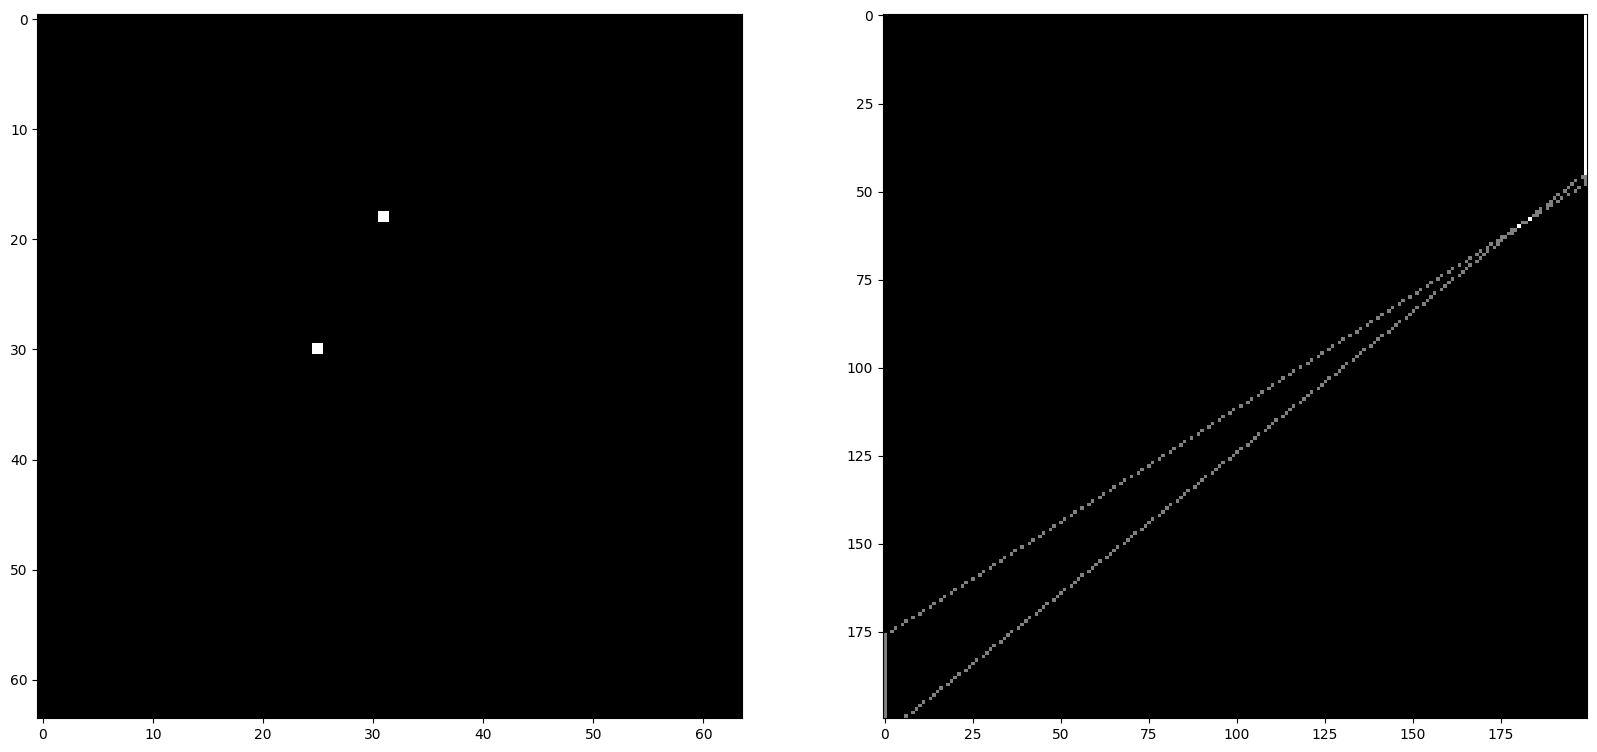

In [47]:
im2 = im.copy()

im2[30, 25] = 1


show_all([
    im2,
    hough_ab(im2, -5, 5, 0.05, -100, 100, 1)
])

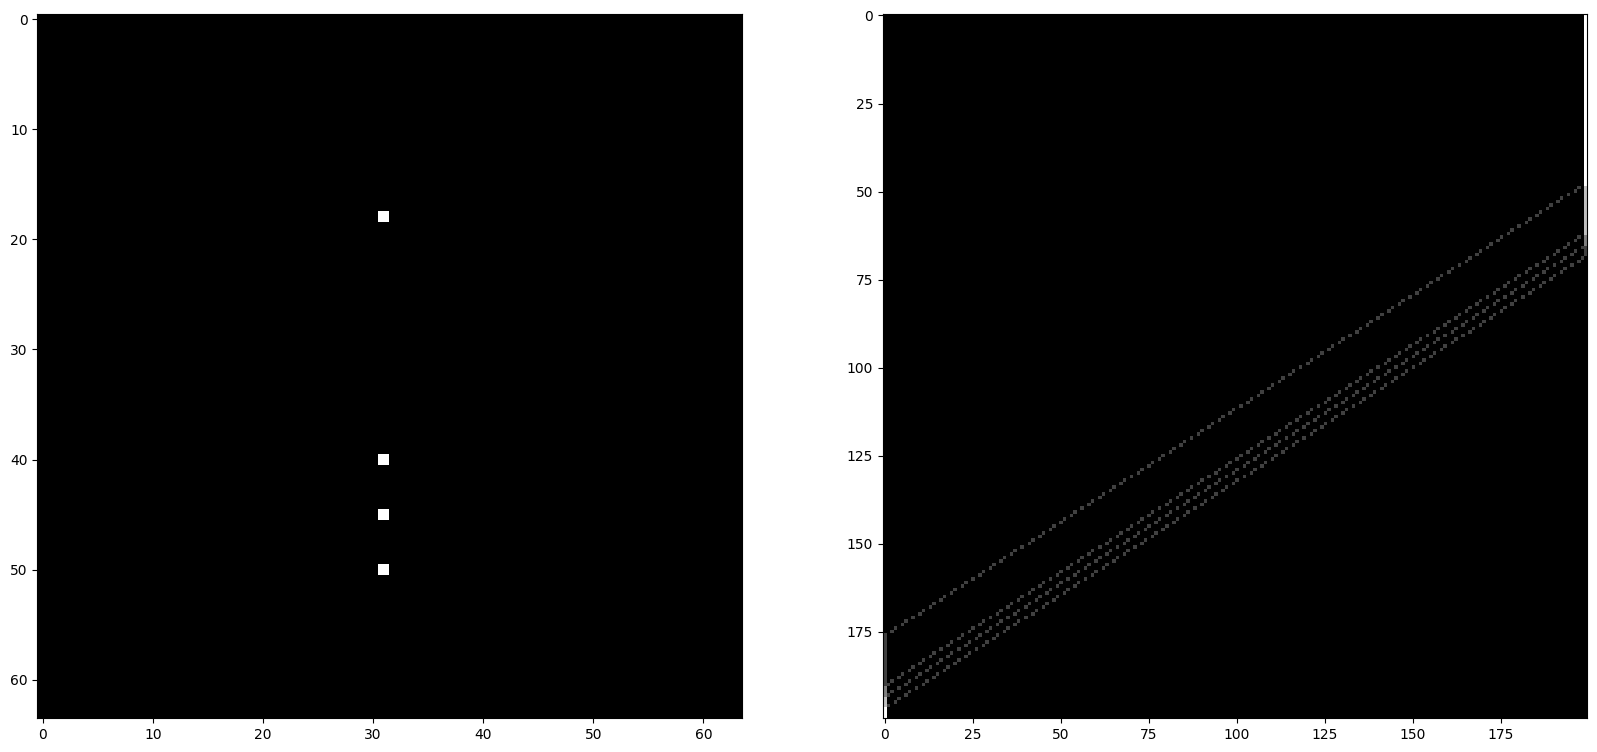

In [48]:
im3 = im.copy()

im3[40, 31] = 1
im3[45, 31] = 1
im3[50, 31] = 1


show_all([
    im3,
    hough_ab(im3, -5, 5, 0.05, -100, 100, 1)
])

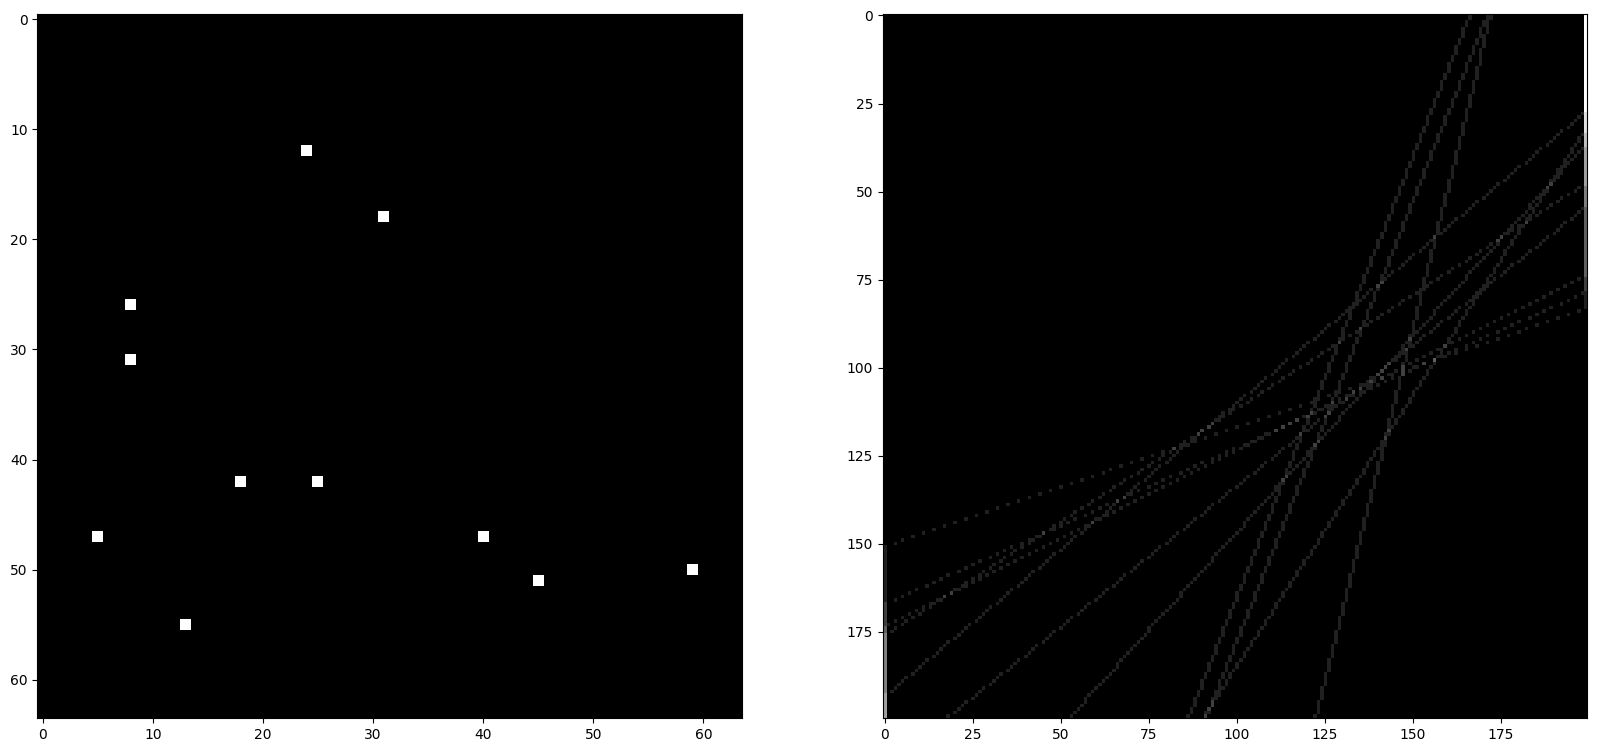

In [49]:
import random


im4 = im.copy()
im4_height, im4_width = im4.shape

for _ in range(10):
    im4[random.randint(0, im4_height - 1), random.randint(0, im4_width - 1)] = 1

show_all([
    im4,
    hough_ab(im4, -5, 5, 0.05, -100, 100, 1)
])


W przypadku punktów leżących bezpośrednio pod sobą, reprezentacja ta nie sprawdzi się

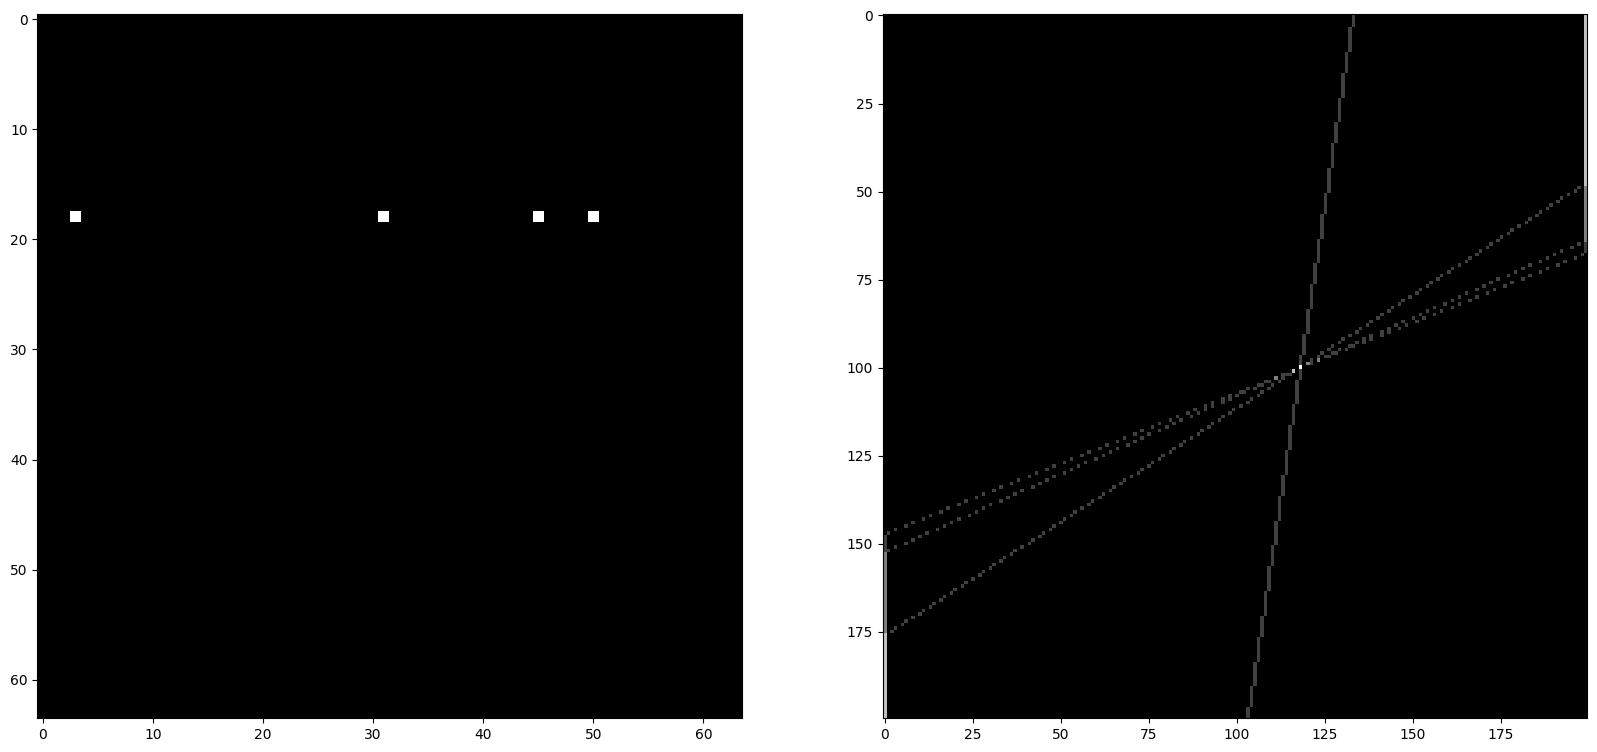

In [50]:
im5 = im.copy()

im5[18, 45] = 1
im5[18, 50] = 1
im5[18, 3] = 1

show_all([
    im5,
    hough_ab(im5, -5, 5, 0.05, -100, 100, 1)
])

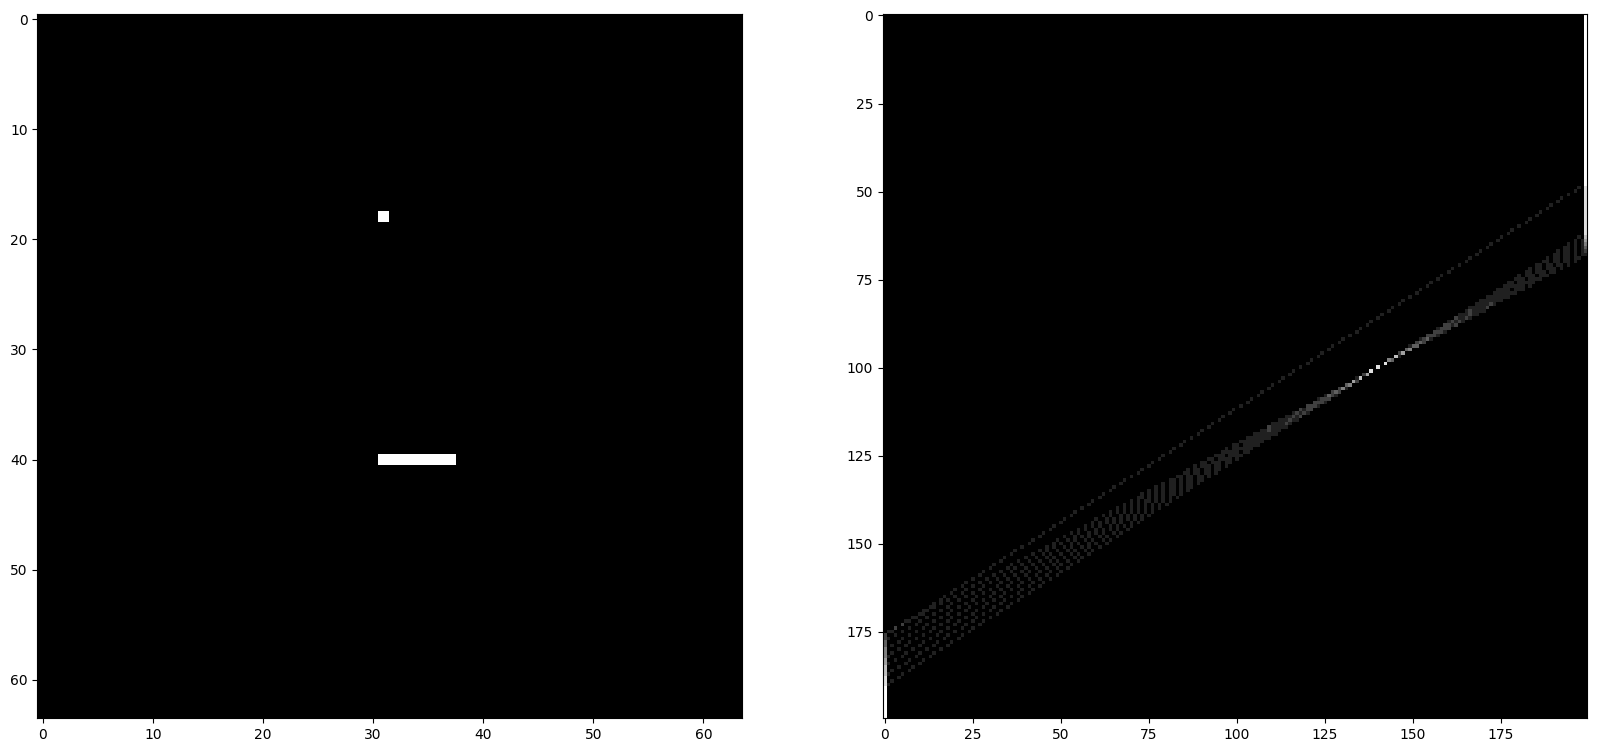

In [51]:
im6 = im.copy()

# im6[18, 45] = 1
# im6[18, 50] = 1
# im6[18, 3] = 1
im6[40,31] = 1
im6[40,32] = 1
im6[40,33] = 1
im6[40,34] = 1
im6[40,35] = 1
im6[40,36] = 1
im6[40,37] = 1

show_all([
    im6,
    hough_ab(im6, -5, 5, 0.05, -100, 100, 1)
])